In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import multivariate_normal

In [12]:
X = np.linspace(0, 4*np.pi, 101)
sigma_sq = 0.05
y= np.sin(X) + np.random.normal(0, 0.05, 101)

In [13]:
def Kernel(x, x_, rho_sq,l):
    return rho_sq*np.exp(-(x-x_)**2 / l**2)

In [14]:
def Mu(y, K, sigma_sq, N):
    return np.dot(np.matmul(K,np.linalg.inv((K + np.eye(N)*(sigma_sq)))),y)

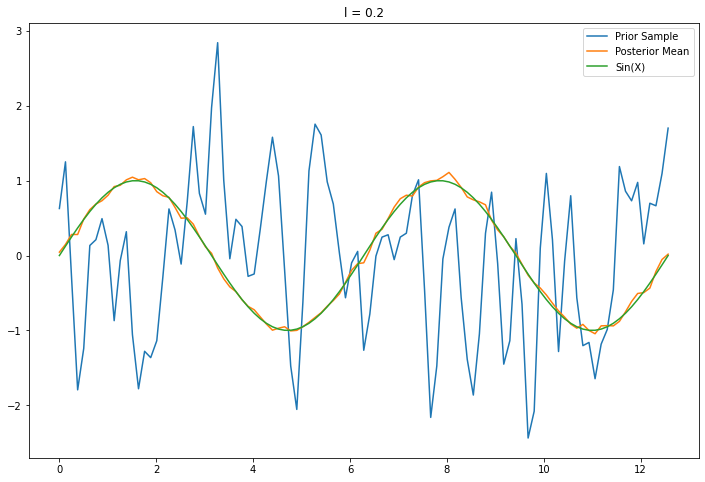

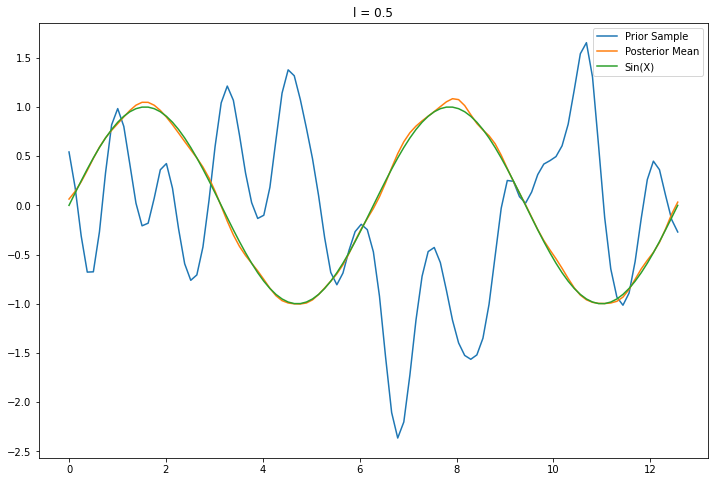

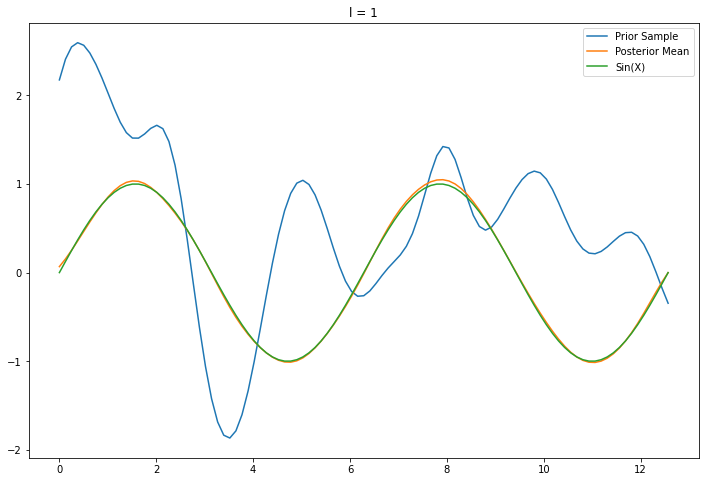

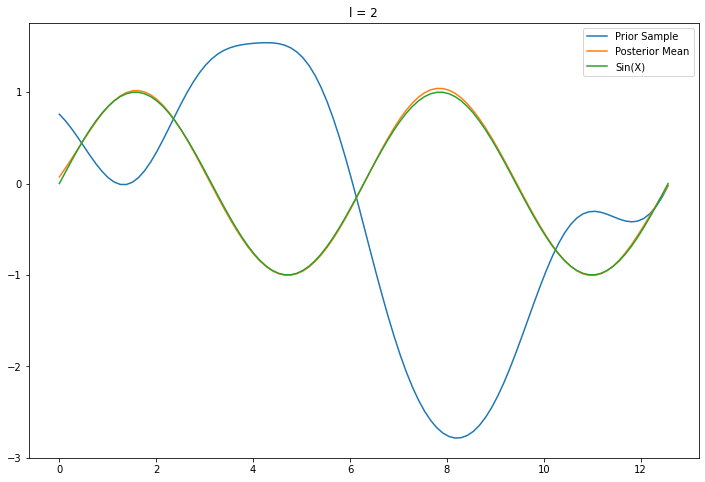

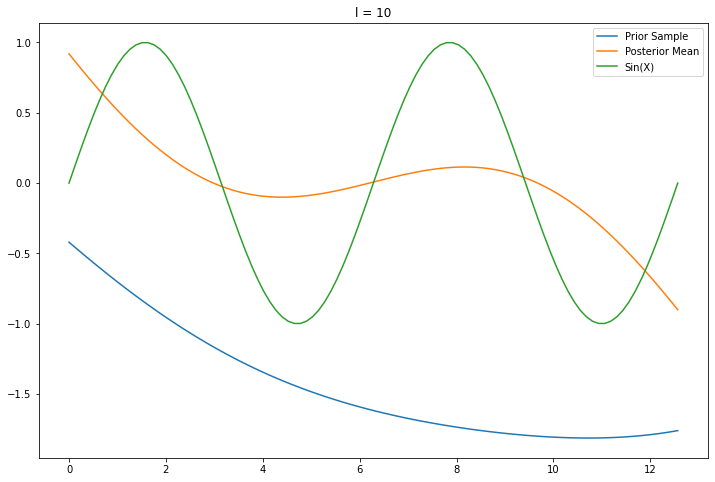

In [18]:
rho_sq=1
for l in [0.2,0.5,1,2,10]:
    K=[]
    for x in X:
        L=[]
        for x_ in X:
            if(x==x_):
                L.append(Kernel(x, x_, rho_sq,l))
            else:
                L.append(Kernel(x, x_, rho_sq,l))
        K.append(L)
    K=np.array(K)
    #K = np.array([[Kernel(x, x_, rho_sq,l) for x in X] for x_ in X]) + np.random.uniform(-0.0001, 0.0001, [X.shape[0], X.shape[0]])
    Prior_Sample = np.random.multivariate_normal(np.zeros(X.shape), K)
    f_mean = Mu(y, K, sigma_sq, X.shape[0])
    plt.figure(figsize=[12,8])
    # f = open(str(l) + ".csv", "w")
    # f.write(str(f_mean))
    plt.plot(X, Prior_Sample, label = "Prior Sample")
    plt.plot(X, f_mean, label = "Posterior Mean")
    # plt.plot(X, y, label = "Y")
    plt.plot(X, np.sin(X), label = "Sin(X)")
    plt.title("l = " + str(l))
    plt.legend()
    plt.savefig('l='+str(l)+'.png')
    plt.show()